In [1]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
data_dir = "D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dataset"

In [13]:
data = []

In [14]:
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            data.append({"image_path": image_path, "label": folder_name})


In [15]:
df = pd.DataFrame(data)
print("Dataset Overview:")
print(df.head())
print(f"Total Images: {len(df)}")
print(f"Total Classes: {df['label'].nunique()}")

Dataset Overview:
                                          image_path     label
0  D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dat...  Aloevera
1  D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dat...  Aloevera
2  D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dat...  Aloevera
3  D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dat...  Aloevera
4  D:\MED_LEAF_ID\data\dataset\Medicinal Leaf dat...  Aloevera
Total Images: 12816
Total Classes: 90


In [16]:
print("\nClass Distribution:")
print(df['label'].value_counts())


Class Distribution:
label
Tulasi          323
Curry_Leaf      314
Doddpathre      288
Mint            288
Castor          283
               ... 
Kasambruga       48
Pea              47
Seethaashoka     47
Raddish          40
Turmeric         39
Name: count, Length: 90, dtype: int64


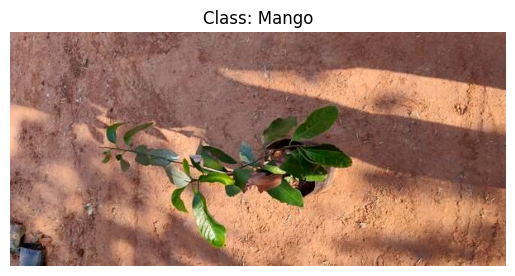

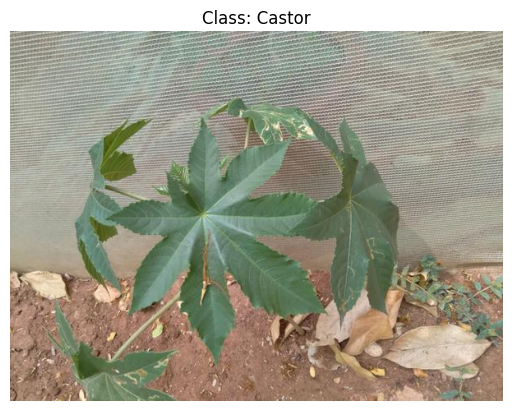

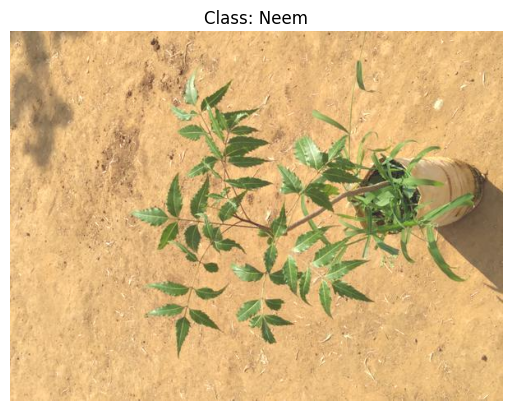

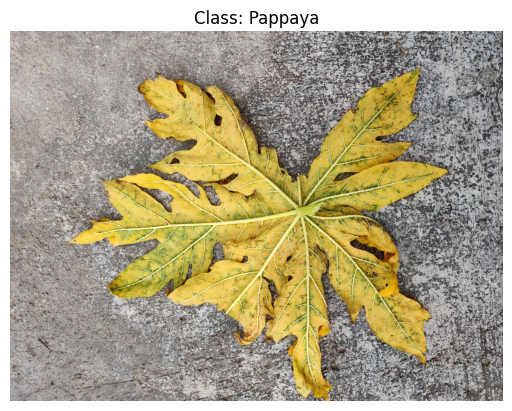

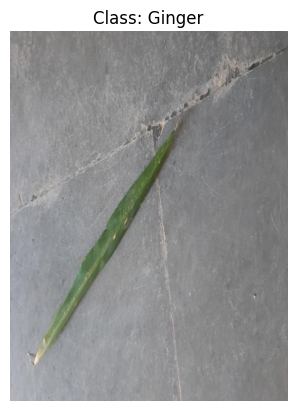

In [17]:
import random

# Display random images
for i in range(5):
    random_row = df.sample(1).iloc[0]
    img = Image.open(random_row['image_path'])
    plt.imshow(img)
    plt.title(f"Class: {random_row['label']}")
    plt.axis("off")
    plt.show()

In [19]:
# Collect image properties
dimensions = []
for img_path in df['image_path']:
    with Image.open(img_path) as img:
        dimensions.append(img.size)

# Analyze properties
dim_df = pd.DataFrame(dimensions, columns=["Width", "Height"])
print("Image Properties Summary:")
print(dim_df.describe())


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\MED_LEAF_ID\\data\\dataset\\Medicinal Leaf dataset\\Sapota\\VID_20190921_120806.mp4'

In [ ]:
# Check for class imbalance
import seaborn as sns

sns.countplot(data=df, y="label", order=df['label'].value_counts().index)
plt.title("Class Distribution")
plt.show()

# Check for corrupt images
corrupt_count = 0
for img_path in df['image_path']:
    try:
        with Image.open(img_path) as img:
            img.verify()  # Verify if the image is valid
    except:
        corrupt_count += 1
print(f"Corrupt images: {corrupt_count}")


In [ ]:
class_distribution = df['label'].value_counts()

# Convert the distribution to string for better formatting
class_distribution_str = class_distribution.to_string()

# Print the entire distribution
print(class_distribution_str)

